<a href="https://colab.research.google.com/github/NoCodeProgram/deepLearning/blob/main/nn/early_stopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/NoCodeProgram/deepLearning.git


Cloning into 'deepLearning'...
remote: Enumerating objects: 96, done.
remote: Counting objects: 100% (96/96), done.
remote: Compressing objects: 100% (89/89), done.
remote: Total 96 (delta 24), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (96/96), 3.66 MiB | 7.39 MiB/s, done.
Resolving deltas: 100% (24/24), done.


In [2]:
import torch
import pandas as pd

# Load the DataFrame from a CSV file
df = pd.read_csv('./deepLearning/nn/swirl.csv')
data = df[['x', 'y']].values
labels = df['label'].values.reshape(-1, 1)

# Print the shapes of the data and labels
print('Data shape:', data.shape)
print('Labels shape:', labels.shape)



Data shape: (280, 2)
Labels shape: (280, 1)


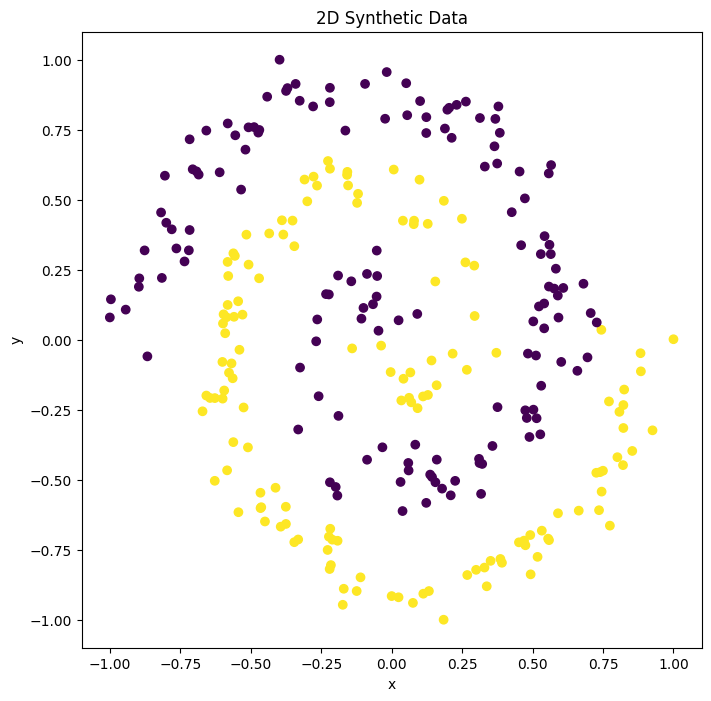

In [3]:

import matplotlib.pyplot as plt
# Create a scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(data[:,0], data[:,1], c=labels, cmap='viridis')
# plt.scatter(val_data[:,0], val_data[:,1], c=val_labels, cmap='viridis')

# Set the title and labels
plt.title('2D Synthetic Data')
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

In [4]:
import torch

# Convert the numpy arrays to PyTorch tensors
data_torch = torch.tensor(data, dtype=torch.float32)
labels_torch = torch.tensor(labels, dtype=torch.float32)
data_length = len(data_torch)
split_length = int(0.7*data_length)

train_data = data_torch[:split_length]
train_labels = labels_torch[:split_length]
val_data = data_torch[split_length:]
val_labels = labels_torch[split_length:]

print(train_data.shape, train_labels.shape)

torch.Size([196, 2]) torch.Size([196, 1])


In [7]:
import torch
import torch.nn as nn
import torch.optim as optim

g = torch.Generator().manual_seed(42)
g.manual_seed(42)
torch.manual_seed(42)

class DNet(nn.Module):
    def __init__(self, input_size: int, hidden_size: int, output_size: int):
        super().__init__()
        self.seq_model = nn.Sequential(
            nn.Linear(input_size, hidden_size,bias=True),

            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size,bias=True),

            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size,bias=True),

            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(hidden_size, hidden_size,bias=True),

            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(hidden_size, output_size)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.seq_model(x)


dnet = DNet(input_size=2,hidden_size=16,output_size=1)
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(dnet.parameters(), lr=0.01)

t_losses = []
val_losses = []

for steps in range(50000):
    dnet.train()

    output = dnet(train_data)
    train_loss = loss_fn(output, train_labels)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if steps % 10 == 0:
        dnet.eval()
        output = dnet(val_data)
        val_loss = loss_fn(output, val_labels)
        output = dnet(train_data)
        t_loss = loss_fn(output,train_labels)
        t_losses.append(t_loss.item())
        val_losses.append(val_loss.item())
        print(f"{steps} val_loss: {val_loss.item()}, train_loss: {t_loss.item()}")


0 val_loss: 0.6986285448074341, train_loss: 0.6956262588500977
10 val_loss: 0.6983290910720825, train_loss: 0.6954140663146973
20 val_loss: 0.6980547308921814, train_loss: 0.6952260136604309
30 val_loss: 0.6977909207344055, train_loss: 0.6950458884239197
40 val_loss: 0.6975520253181458, train_loss: 0.6948809027671814
50 val_loss: 0.6973202228546143, train_loss: 0.6947291493415833
60 val_loss: 0.697106659412384, train_loss: 0.6945889592170715
70 val_loss: 0.6969023942947388, train_loss: 0.694453775882721
80 val_loss: 0.6967265605926514, train_loss: 0.6943433284759521
90 val_loss: 0.6965711712837219, train_loss: 0.6942458748817444
100 val_loss: 0.6963969469070435, train_loss: 0.6941355466842651
110 val_loss: 0.6962149143218994, train_loss: 0.6940233707427979
120 val_loss: 0.6960594654083252, train_loss: 0.6939280033111572
130 val_loss: 0.6959155201911926, train_loss: 0.6938427686691284
140 val_loss: 0.6957721710205078, train_loss: 0.6937555074691772
150 val_loss: 0.6956433057785034, trai

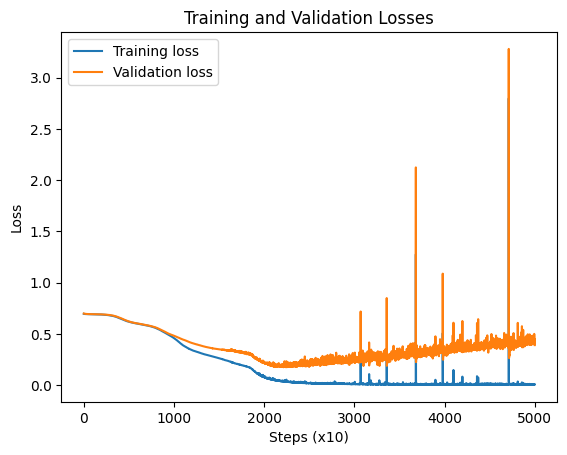

In [8]:
import matplotlib.pyplot as plt

# Assumes `t_losses` and `val_losses` are lists of loss values
plt.plot(t_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.title('Training and Validation Losses')
plt.xlabel('Steps (x10)')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [9]:
import torch
import torch.nn as nn
import torch.optim as optim

g = torch.Generator().manual_seed(42)
g.manual_seed(42)
torch.manual_seed(42)

class DNet(nn.Module):
    def __init__(self, input_size: int, hidden_size: int, output_size: int):
        super().__init__()
        self.seq_model = nn.Sequential(
            nn.Linear(input_size, hidden_size,bias=True),

            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size,bias=True),

            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size,bias=True),

            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(hidden_size, hidden_size,bias=True),

            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(hidden_size, output_size)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.seq_model(x)


dnet = DNet(input_size=2,hidden_size=16,output_size=1)
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(dnet.parameters(), lr=0.01)

t_losses = []
val_losses = []

min_val_loss : float = float('inf')
patience : int = 100  # Number of epochs to wait for improvement before stopping
steps_no_improve : int= 0
min_step : int = 0

for steps in range(50000):
    dnet.train()

    output = dnet(train_data)
    train_loss = loss_fn(output, train_labels)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if steps % 10 == 0:
        dnet.eval()
        output = dnet(val_data)
        val_loss = loss_fn(output, val_labels)
        output = dnet(train_data)
        t_loss = loss_fn(output,train_labels)

        if val_loss < min_val_loss:
            min_val_loss = val_loss
            steps_no_improve = 0
            min_step = steps
            #save model here
        else:
            steps_no_improve += 1
            if steps_no_improve == patience:
                print(f'Early stopping! min step : {min_step}')
                break  # Early stop


        t_losses.append(t_loss.item())
        val_losses.append(val_loss.item())
        # print(f"{steps} val_loss: {val_loss.item()}, train_loss: {t_loss.item()}")


Early stopping! min step : 22410


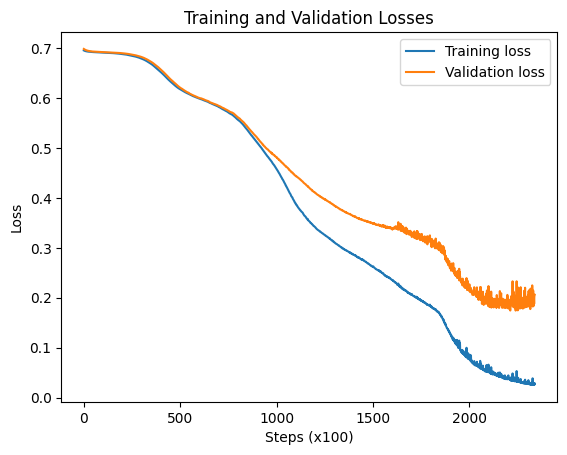

In [10]:
import matplotlib.pyplot as plt

# Assumes `t_losses` and `val_losses` are lists of loss values
plt.plot(t_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.title('Training and Validation Losses')
plt.xlabel('Steps (x100)')
plt.ylabel('Loss')
plt.legend()
plt.show()
